# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os

import matplotlib.pyplot as plt
from IPython.display import Image as Img_show

2024-01-30 12:31:15.157548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 12:31:15.157666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 12:31:15.283249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Exploring Dataset

In [2]:
train_path = '/kaggle/input/wildfirev1/train'
valid_path = '/kaggle/input/wildfirev1/valid'
test_path = '/kaggle/input/wildfirev1/test'
train_annot = pd.read_csv('/kaggle/input/wildfirev1/train/_annotations.csv')
valid_annot = pd.read_csv('/kaggle/input/wildfirev1/valid/_annotations.csv')
test_annot = pd.read_csv('/kaggle/input/wildfirev1/test/_annotations.csv')

In [3]:
train_annot

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ck0qd8gs6ko7j0721x25cv4o3_jpeg.rf.005f5707706e...,640,480,smoke,125,190,177,286
1,ck0t40rhdz68s0a46ekx049a6_jpeg.rf.00403179fe5f...,640,480,smoke,326,207,494,249
2,ck0m0ch9ugnna07940o8x989j_jpeg.rf.0101cdb46a16...,640,480,smoke,308,166,582,257
3,ck0rr6bfa9b3w0721aw5unwdy_jpeg.rf.00982c053d66...,640,480,smoke,241,204,310,244
4,ck0uk75x5ysls0721e5a9j891_jpeg.rf.00d7fd8503e1...,640,480,smoke,523,208,619,288
...,...,...,...,...,...,...,...,...
511,ck0tz35vrt1xh08382lzzsg2v_jpeg.rf.fbfc29bec37e...,640,480,smoke,119,191,177,285
512,ck0ujoiltwezp0944u48gk6wn_jpeg.rf.ff498f409458...,640,480,smoke,1,242,150,333
513,ck0ng5zyb5lrz086320xihwm8_jpeg.rf.feb1d8a9088c...,640,480,smoke,150,203,211,231
514,ck0kdpfyk4t8v08633b9u5zhe_jpeg.rf.ff2afd2c799d...,640,480,smoke,283,240,416,318


In [4]:
def visualize_annotations(image, annotations):

    for index, row in annotations.iterrows():
        x1 = int(row["xmin"])
        y1 = int(row["ymin"])
        x2 = int(row["xmax"])
        y2 = int(row["ymax"])
        label = row["class"]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

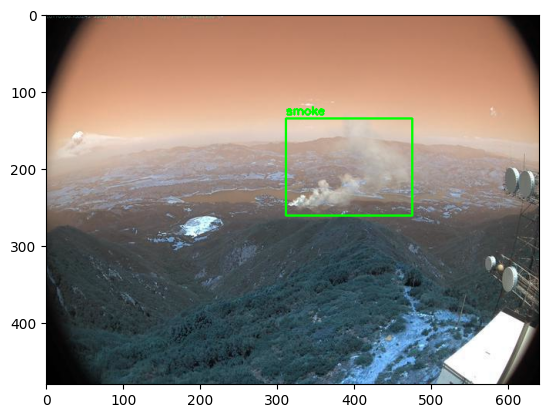

In [5]:
for i in os.listdir(train_path)[2:]:
    img = cv2.imread(os.path.join(train_path, i), cv2.IMREAD_COLOR)
    image_annotations = train_annot[train_annot['filename'] == i]
    annotated_image = visualize_annotations(img, image_annotations)
    plt.imshow(annotated_image)
    break